<a href="https://colab.research.google.com/github/hamid5771/ANNs_C1/blob/main/NeuralNetwork_WS_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# basic packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures # For feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
data = fetch_california_housing()
features = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MedHouseVal'])
train = pd.concat([features, target], axis = 1)

features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
df = train.copy()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**EDA & Feature Engineering**

In [ ]:
list(df.columns)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [4]:
nothing = df.isnull().sum().sum()
la = len(df.Latitude.unique())
lo = len(df.Longitude.unique())
print('Null values:', nothing)
print(f'number of longitude: {lo}\nnumber of latitude: {la} ')

Null values: 0
number of longitude: 844
number of latitude: 862 


In [5]:
# Create a new feature Geo out of long lati
df['Geo'] = df.Latitude + df.Longitude

In [13]:
#df.drop(df[['Latitude', 'Longitude']], axis = 1, inplace = True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Geo
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,-84.35
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,-84.36
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,-84.39
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,-84.40
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,-84.40
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,-81.61
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,-81.72
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,-81.79
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,-81.89


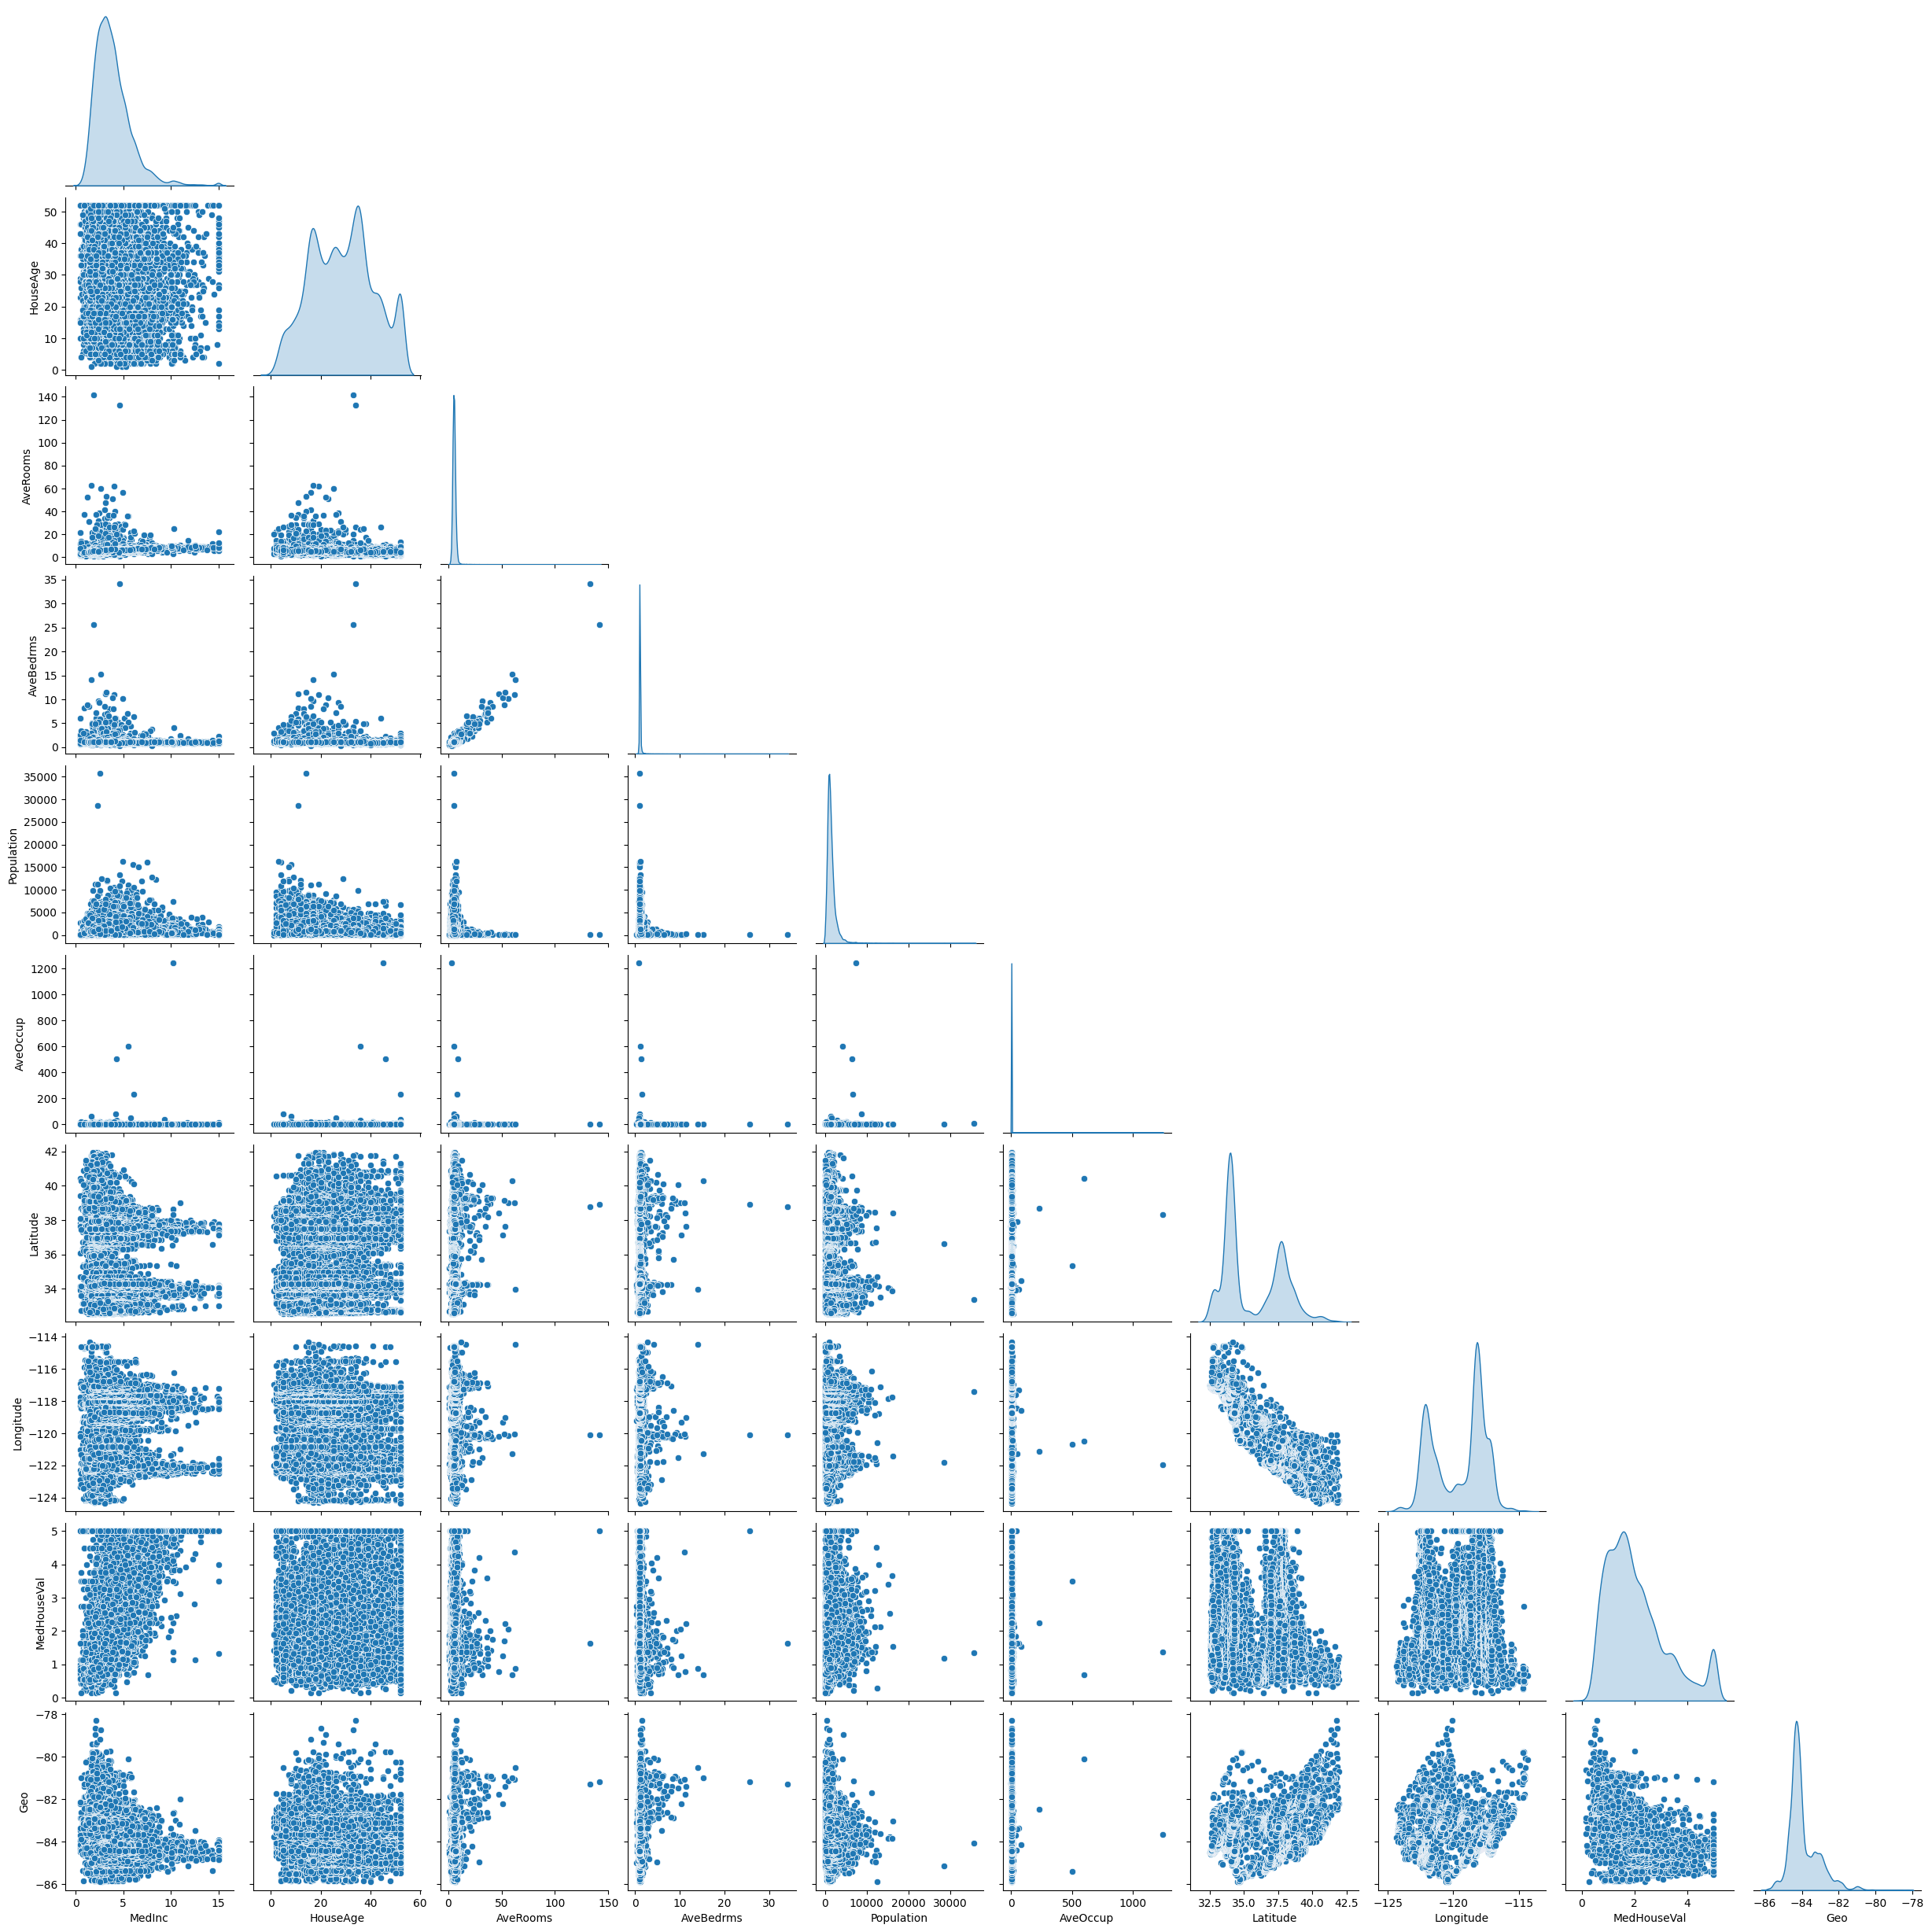

In [14]:
sns.pairplot(df, diag_kind = 'kde', corner = True)
plt.show()

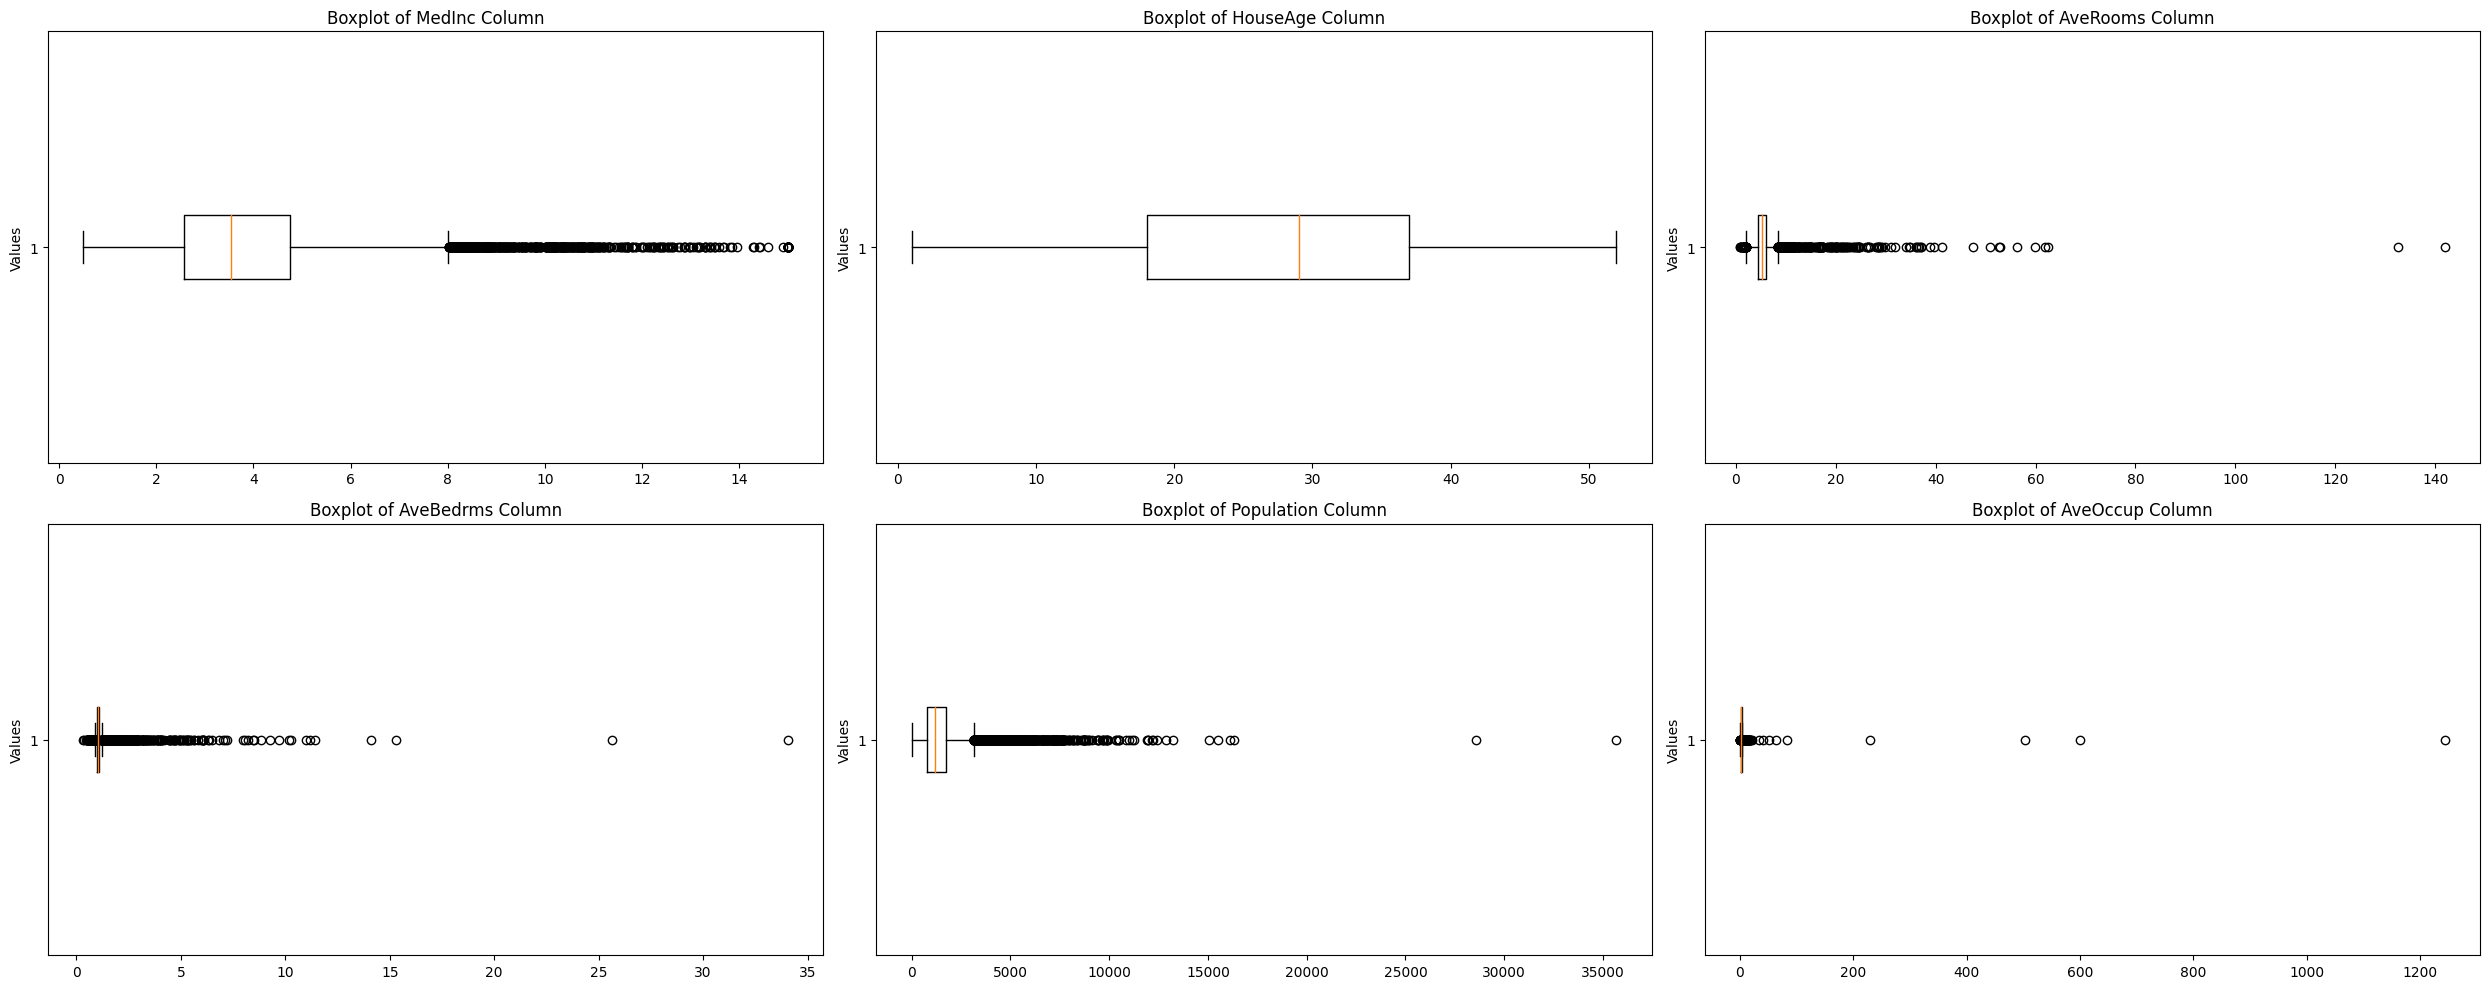

In [15]:
vars = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

n_cols = 3
n_rows = (len(vars) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 10))
axes = axes.flatten()

for i, col in enumerate(vars):
    axes[i].boxplot(df[col], vert = False)
    axes[i].set_title(f'Boxplot of {col} Column')
    axes[i].set_ylabel('Values')

# Hide any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
lower_quantile_AveRooms = df['AveRooms'].quantile(0.01) # finind extreme outliers in AveRooms col
upper_quantile_AveRooms = df['AveRooms'].quantile(0.99)
lower_quantile_AveBedrms = df['AveBedrms'].quantile(0.01) # finind extreme outliers in AveBedrms col
upper_quantile_AveBedrms = df['AveBedrms'].quantile(0.99)


df_new = df[ (df['AveRooms'] >= lower_quantile_AveRooms) &
           (df['AveRooms'] <= upper_quantile_AveRooms) &
           (df['AveBedrms'] >= lower_quantile_AveBedrms) &
           (df['AveBedrms'] <= upper_quantile_AveBedrms)
        ]

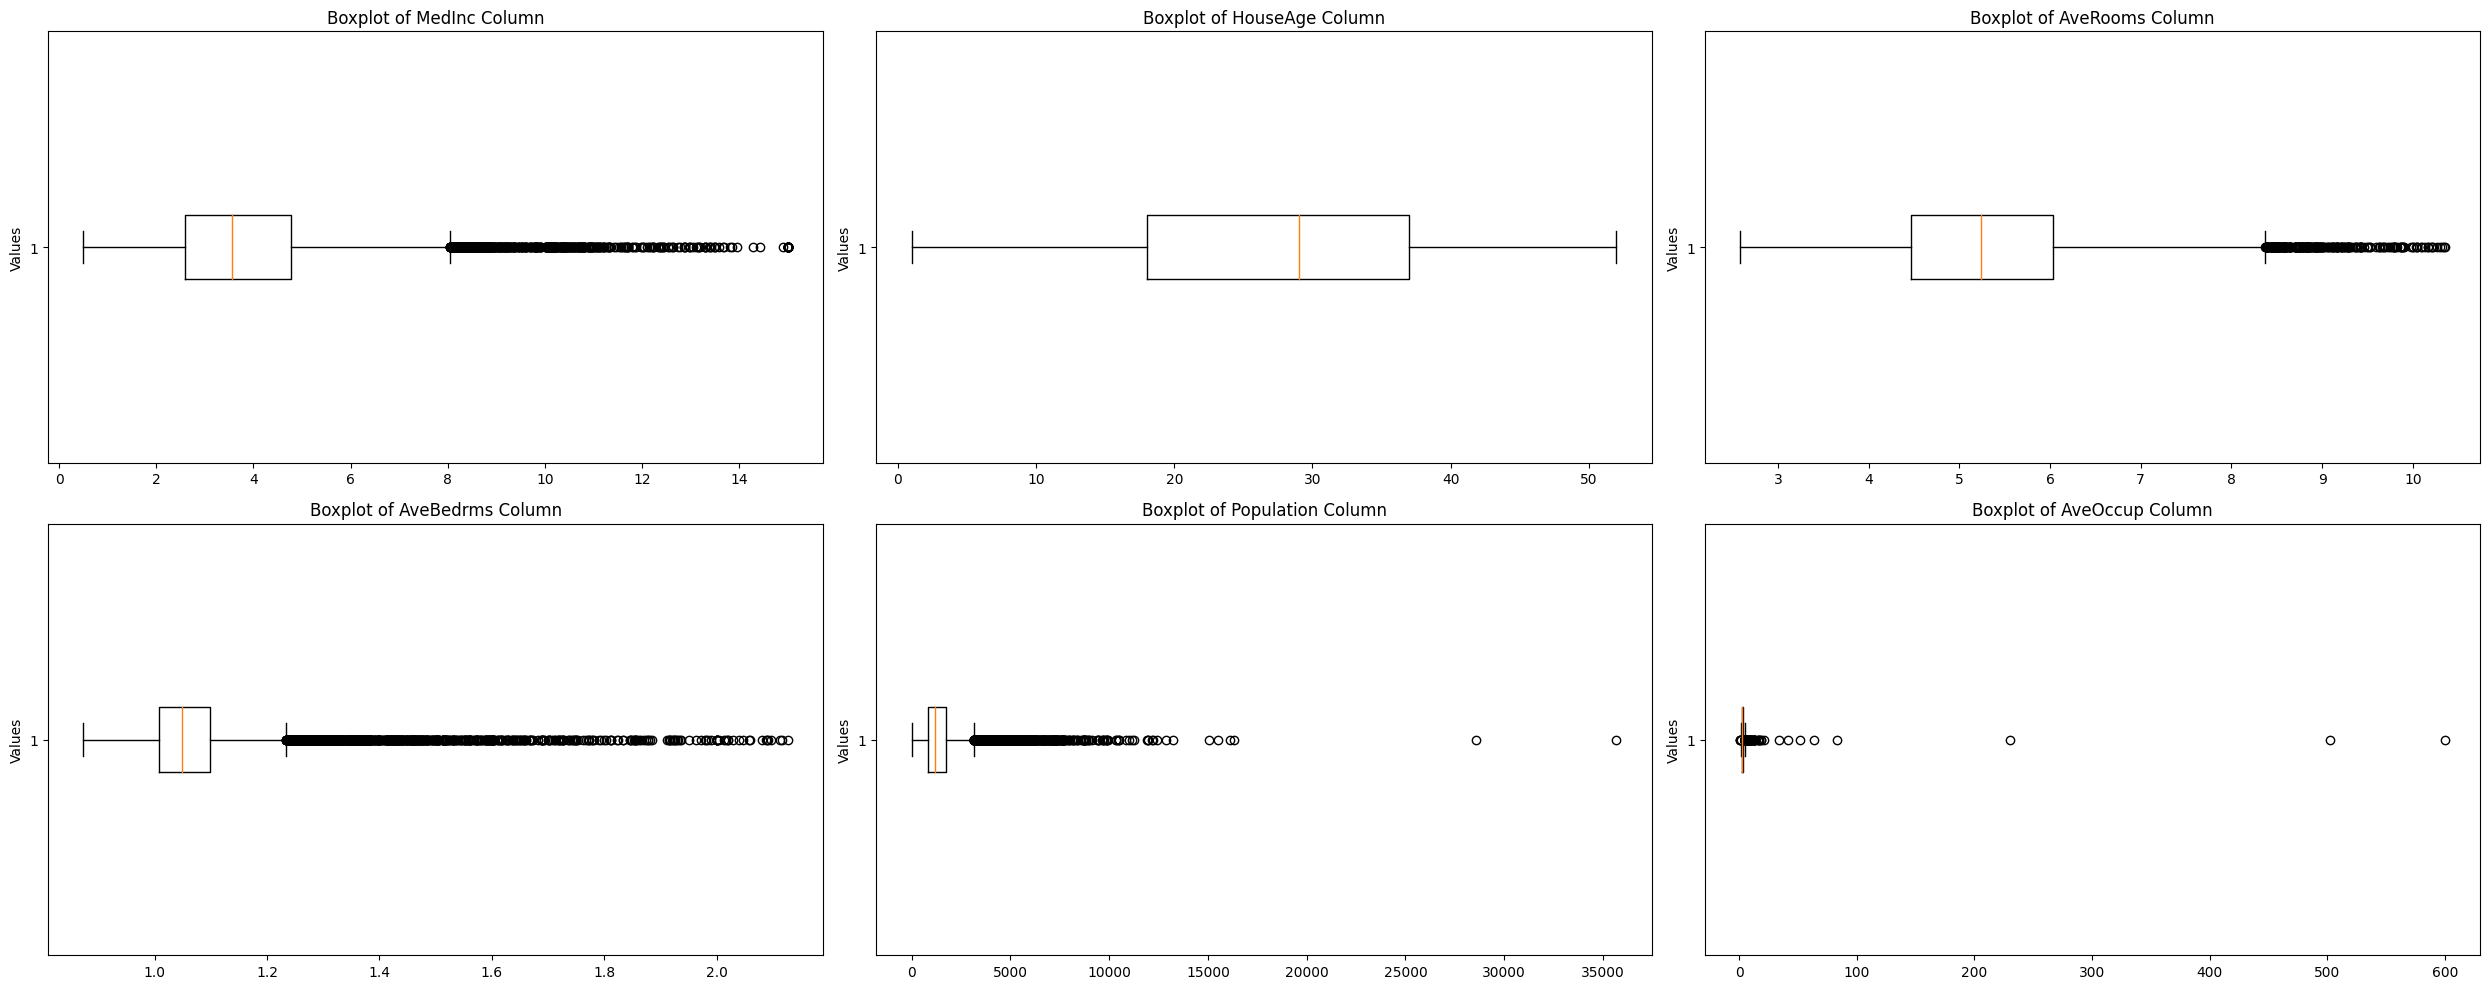

******************************
(20007, 10)


In [22]:
new_instances = df_new.shape
vars = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

n_cols = 3
n_rows = (len(vars) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 10))
axes = axes.flatten()

for i, col in enumerate(vars):
    axes[i].boxplot(df_new[col], vert = False)
    axes[i].set_title(f'Boxplot of {col} Column')
    axes[i].set_ylabel('Values')

# Hide any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
print(3*'**********')
print(new_instances)

In [23]:
df_new

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Geo
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,-84.35
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,-84.36
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,-84.39
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,-84.40
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,-84.40
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,-81.61
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,-81.72
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,-81.79
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,-81.89


In [26]:
X, y = df_new.drop(['MedHouseVal','Latitude', 'Longitude'], axis = 1), df_new['MedHouseVal']

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (common preprocessing step)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

## PyTorch Setup for Regression (Price Prediction)

In [30]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim


In [108]:
# Convert data to PyTorch tensors (backend setup)
X_train_tensor = torch.tensor(X_train_scale, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scale, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train_tensor,
                                        y_train_tensor.view(-1, 1)),
                           batch_size=128,
                           shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor,
                                       y_test_tensor.view(-1, 1)),
                          batch_size=128,
                          shuffle=False)


In [102]:
input_size = X_train_tensor.shape[1]
input_size

7

In [109]:
# Create the model
class RegressionNN(nn.Module):
    def __init__(self, input_size = input_size):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        #self.fc3 = nn.Linear(128, 128)
        #self.fc4 = nn.Linear(128, 64)
        #self.fc5 = nn.Linear(64, 32)
        #self.fc6 = nn.Linear(32, 16)
        self.fc7 = nn.Linear(32, 1) # 1 output for house value prediction

    def forward(self, x):
      # functional API
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        #x = torch.relu(self.fc3(x))
        #x = torch.relu(self.fc4(x))
        #x = torch.relu(self.fc5(x))
        #x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x


In [110]:
# Initialize the model, loss function, and optimizer
pytorch_model = RegressionNN()

criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)


In [36]:
!pip install torchsummary

In [111]:
from torchsummary import summary
print("PyTorch Model Summary:")
summary(pytorch_model, input_size=(input_size,))

PyTorch Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             512
            Linear-2                   [-1, 32]           2,080
            Linear-3                    [-1, 1]              33
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [112]:
def train_regression(train_loader, model, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            targets = targets.view(-1, 1)
            loss = criterion(outputs, targets)
            loss.backward() # backpropagation
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


train_regression(train_loader,
                 pytorch_model,
                 criterion,
                 optimizer,
                 num_epochs = 50)

Epoch 1/50, Loss: 1.9191491923753232
Epoch 2/50, Loss: 0.47145612183071317
Epoch 3/50, Loss: 0.39613446676068836
Epoch 4/50, Loss: 0.3750042570015741
Epoch 5/50, Loss: 0.3648385134717775
Epoch 6/50, Loss: 0.3568246259339272
Epoch 7/50, Loss: 0.3581556213043985
Epoch 8/50, Loss: 0.3457010531472781
Epoch 9/50, Loss: 0.34536979406599017
Epoch 10/50, Loss: 0.3373977080697105
Epoch 11/50, Loss: 0.3385137781973869
Epoch 12/50, Loss: 0.33641441565539154
Epoch 13/50, Loss: 0.328125926769442
Epoch 14/50, Loss: 0.3286304263368485
Epoch 15/50, Loss: 0.3230871195121417
Epoch 16/50, Loss: 0.3242929555357449
Epoch 17/50, Loss: 0.31927988293861587
Epoch 18/50, Loss: 0.3193764403935463
Epoch 19/50, Loss: 0.31911391611137085
Epoch 20/50, Loss: 0.31477304973772596
Epoch 21/50, Loss: 0.313331974522462
Epoch 22/50, Loss: 0.31395693383519613
Epoch 23/50, Loss: 0.3123644032175579
Epoch 24/50, Loss: 0.30999845467389575
Epoch 25/50, Loss: 0.3093336064900671
Epoch 26/50, Loss: 0.30703865949596676
Epoch 27/50, 

In [113]:
def eval_regression(test_loader, model):
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            output = model(X_batch)
            loss = criterion(output, y_batch)
            test_loss += loss.item()
    return test_loss / len(test_loader)

test_loss = eval_regression(test_loader, pytorch_model)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.2892


In [114]:
# Get a batch of data from the training set in PyTorch
data_iter = iter(train_loader)
X_batch, y_batch = next(data_iter)


# Forward pass through the model to get predictions (continuous values for regression)
outputs = pytorch_model(X_batch)

# Print the predicted values and actual values for the batch (regression outputs)
print(f'Predicted values (PyTorch): {outputs.squeeze().detach().numpy()}')  # Squeeze and convert to numpy for readability
print(f'Actual values (PyTorch): {y_batch.squeeze().detach().numpy()}')  # Squeeze and convert to numpy for readability

# Calculate the Mean Squared Error (MSE) for this batch
mse_loss = nn.MSELoss()
loss = mse_loss(outputs, y_batch)
print(f'Mean Squared Error for this batch (PyTorch): {loss.item():.4f}')


Predicted values (PyTorch): [1.4426334  1.9909198  1.6035337  3.7115924  1.9113826  0.70327723
 2.5712254  1.8899753  2.080792   1.6659808  1.2688755  4.9242654
 2.100295   5.0575633  1.2186484  1.1371078  1.701817   3.4561799
 1.5610297  1.0314054  1.2798585  1.8792467  3.3322217  1.1750933
 1.2669177  1.1025345  2.8698416  1.3512552  2.3982062  1.7360114
 2.4239676  3.2426832  2.326825   1.9122204  0.84674007 0.8502243
 0.94698167 0.88670456 2.353033   3.6206677  1.2839532  4.054513
 1.7110839  1.0147597  1.1085391  1.475102   0.9972461  2.2209852
 2.7596319  1.1006982  2.733198   1.9443914  1.98407    2.350056
 1.7156899  3.122131   1.8295958  4.267874   1.9595618  0.79911923
 3.5854073  1.0556852  2.389996   2.5721986  1.7306128  3.0047872
 2.4099069  4.314388   2.3274233  1.118106   2.8154347  1.4286397
 2.2726173  2.32877    2.6702547  1.209354   1.8129523  1.3020971
 4.2500215  1.1925201  1.2538245  3.1202836  2.4303248  0.80346495
 3.073999   1.8181186  2.2848313  2.066102   1.

Epoch [1/100], Train Loss: 0.2909, Test Loss: 0.2847
Epoch [2/100], Train Loss: 0.2925, Test Loss: 0.2862
Epoch [3/100], Train Loss: 0.2886, Test Loss: 0.2847
Epoch [4/100], Train Loss: 0.2889, Test Loss: 0.2916
Epoch [5/100], Train Loss: 0.2953, Test Loss: 0.2898
Epoch [6/100], Train Loss: 0.2907, Test Loss: 0.2855
Epoch [7/100], Train Loss: 0.2873, Test Loss: 0.2952
Epoch [8/100], Train Loss: 0.2866, Test Loss: 0.3072
Epoch [9/100], Train Loss: 0.2869, Test Loss: 0.3001
Epoch [10/100], Train Loss: 0.2911, Test Loss: 0.3020
Epoch [11/100], Train Loss: 0.2884, Test Loss: 0.2844
Epoch [12/100], Train Loss: 0.2842, Test Loss: 0.3004
Epoch [13/100], Train Loss: 0.2852, Test Loss: 0.2911
Epoch [14/100], Train Loss: 0.2865, Test Loss: 0.3025
Epoch [15/100], Train Loss: 0.2881, Test Loss: 0.2878
Epoch [16/100], Train Loss: 0.2880, Test Loss: 0.2935
Epoch [17/100], Train Loss: 0.2820, Test Loss: 0.2866
Epoch [18/100], Train Loss: 0.2825, Test Loss: 0.2881
Epoch [19/100], Train Loss: 0.2838, T

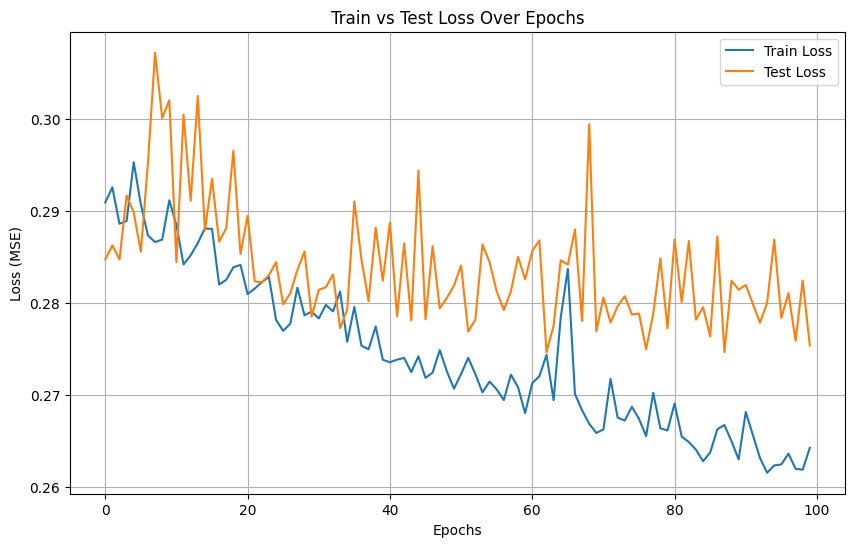

In [115]:
# Function to train the model and collect loss values for plotting
def train_regression_with_curves(train_loader, test_loader, model, criterion,
                                 optimizer,
                                 epochs=20):
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Average loss for this epoch
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Evaluate on the test set after each epoch
        test_loss = evaluate_regression(test_loader, model)
        test_losses.append(test_loss)

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    return train_losses, test_losses

# Evaluate the model on the test set
def evaluate_regression(test_loader, model):
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            output = model(X_batch)
            loss = criterion(output, y_batch)
            test_loss += loss.item()
    return test_loss / len(test_loader)

# Train the model and collect train/test losses
train_losses, test_losses = train_regression_with_curves(train_loader,
                                                         test_loader,
                                                         pytorch_model,
                                                         criterion,
                                                         optimizer,
                                                         epochs=100)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Train vs Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## Keras Setup for Regression (Price Prediction)

In [42]:
##################################
# Keras Setup for Regression
##################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
# Define a simple neural network for regression using Keras
model_keras = Sequential()
model_keras.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_keras.add(Dense(32, activation='relu'))
model_keras.add(Dense(1))  # Single output for regression


# Compile the Keras model
model_keras.compile(optimizer='adam', loss='mean_squared_error', )


In [44]:
# Keras model structure visualization
print("Keras Model Structure:")
model_keras.summary()


Keras Model Structure:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2625 (10.25 KB)
Trainable params: 2625 (10.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Train the Keras model
history = model_keras.fit(X_train_scale, y_train, epochs=50,
                          batch_size=len(X_train_scale),
                          validation_data=(X_test_scale, y_test))


Epoch 1/50
1/1 [==============================] - 0s 100ms/step - loss: 0.2747 - val_loss: 0.2860
Epoch 2/50
1/1 [==============================] - 0s 46ms/step - loss: 0.2750 - val_loss: 0.2859
Epoch 3/50
1/1 [==============================] - 0s 47ms/step - loss: 0.2750 - val_loss: 0.2857
Epoch 4/50
1/1 [==============================] - 0s 45ms/step - loss: 0.2748 - val_loss: 0.2853
Epoch 5/50
1/1 [==============================] - 0s 45ms/step - loss: 0.2744 - val_loss: 0.2848
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 0.2739 - val_loss: 0.2843
Epoch 7/50
1/1 [==============================] - 0s 46ms/step - loss: 0.2734 - val_loss: 0.2838
Epoch 8/50
1/1 [==============================] - 0s 42ms/step - loss: 0.2730 - val_loss: 0.2833
Epoch 9/50
1/1 [==============================] - 0s 41ms/step - loss: 0.2725 - val_loss: 0.2830
Epoch 10/50
1/1 [==============================] - 0s 43ms/step - loss: 0.2722 - val_loss: 0.2827
Epoch 11/50
1/1 [===========

In [64]:
# Evaluate the Keras model on a single batch
X_batch = X_train_scale[:32]  # First 32 samples
y_batch = y_train[:32]
y_pred = model_keras.predict(X_batch)

# Display predicted and actual values in Keras
print(f'Predicted values (Keras): {y_pred.flatten()}')
print(f'Actual values (Keras): {y_batch.values.flatten()}')


1/1 [==============================] - 0s 23ms/step
Predicted values (Keras): [1.1295514  0.8943699  1.1091752  1.173141   2.1588144  2.1640751
 2.507164   1.2668736  1.4386907  2.899067   1.4407024  1.9762108
 0.98830014 3.9566429  1.5678637  1.7001197  1.883369   0.9763183
 2.0815732  1.3578188  1.6746283  1.2463498  1.643431   2.2730205
 1.1774595  1.8322735  2.2157953  2.2991188  0.58407354 3.3905468
 3.4455352  0.91948205]
Actual values (Keras): [1.127 1.113 1.426 1.398 2.041 2.715 2.966 1.03  1.725 3.563 1.408 1.991
 0.77  3.457 0.95  2.125 1.313 0.938 1.884 0.964 1.662 1.225 2.079 2.464
 1.207 1.734 2.171 2.476 0.66  4.186 3.519 0.836]


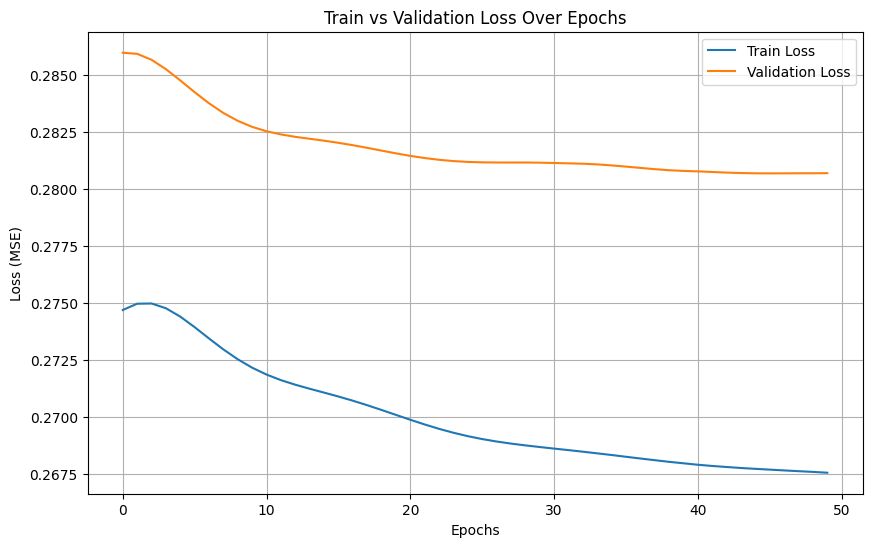

In [65]:
# Step 3: Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Train vs Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
